https://github.com/ccxt/ccxt/wiki
pip install ccxt

https://developers.bitpanda.com/exchange/

In [ ]:
import ccxt
print(ccxt.exchanges) # print a list of all available exchange classes

In [ ]:
import ccxt.async_support as ccxt # link against the asynchronous version of ccxt

In [1]:
# coding=utf-8
from settings import API_KEY
import ccxt

bitpanda = ccxt.bitpanda({
    'apiKey': API_KEY,
    'enableRateLimit': True,
})

# print(bitpanda.requiredCredentials)  # prints required credentials
# bitpanda.checkRequiredCredentials()  # raises AuthenticationError

In [ ]:
# coding=utf-8
from settings import TRADING_API_KEY
import ccxt

bitpanda = ccxt.bitpanda({
    'apiKey': TRADING_API_KEY,
    'enableRateLimit': True,
})

In [ ]:
bitpanda_markets = bitpanda.load_markets()

print(bitpanda)
print(bitpanda.urls)
print(bitpanda.has)
print(bitpanda.timeframes)
print(bitpanda.id, bitpanda_markets)
# print(bitmex.id, bitmex.load_markets())
# print(huobipro.id, huobipro.load_markets())

In [ ]:
print(bitpanda.fetchTradingFees())

In [ ]:
print (bitpanda.fetch_balance ())

In [ ]:
print(bitpanda.fetchMyTrades())

In [ ]:
# print(hitbtc.fetch_order_book(hitbtc.symbols[0]))
print(bitpanda.fetch_ticker('IOTA/EUR'))
print(bitpanda.fetch_ticker('BTC/EUR'))
print(bitpanda.fetch_ticker('DOGE/EUR'))

In [ ]:
print(bitpanda.fetch_trades('IOTA/EUR'))

In [ ]:
import time
if bitpanda.has['fetchOHLCV']:
    for symbol in bitpanda.markets:
        time.sleep (bitpanda.rateLimit / 1000) # time.sleep wants seconds
        print (symbol, bitpanda.fetch_ohlcv (symbol, '1d')) # one day


In [ ]:
print (bitpanda.fetch_ohlcv ('IOTA/EUR', '1d')) # one day

In [ ]:
print (bitpanda.fetchOrderBook ('IOTA/EUR'))

In [ ]:
print (bitpanda.fetch_ohlcv ('IOTA/EUR', '5m')) # five minutes

https://pypi.org/project/mplfinance/

https://code.luasoftware.com/tutorials/algo-trading/python-mplfinance-plot-yfinance-candle-chart-moving-average-macd-and-volume/

https://itnext.io/use-ccxt-to-calculate-cryptocurrency-trade-indicators-102a3ac1428e

https://medium.com/@BlockchainEng/how-to-build-an-automated-cryptocurrency-trading-bot-on-binance-with-python-2cd9b5874e44


In [4]:
import mplfinance as mpf
import talib as ta
import pandas as pd

ticker_name = 'IOTA/EUR'
# ticker_name = 'BTC/EUR'
# ticker_name = 'DOGE/EUR'
# ticker_name = 'HTN/EUR'
# candles = bitpanda.fetch_ohlcv ('IOTA/EUR', '5m')
candles = bitpanda.fetch_ohlcv (ticker_name, '5m')
# mpf.plot(candles[-50:], type='candlestick', no_xgaps = True)
# print(candles[-50:])

# update timestamp to human readable timestamp
candles = [[bitpanda.iso8601(candle[0])] + candle[1:] for candle in candles]
header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
data = pd.DataFrame(candles, columns=header,index=None)

print(data)
# print(data.info())
# print(data.describe())
# print(data.index)
# print(data.columns)


#set index to the obervations after converting them to type datetimeIndex
data.index = pd.to_datetime(data.Timestamp)
# print(data)
# print(data.columns)
# print(data.index)

                    Timestamp     Open     High      Low    Close  Volume
0    2021-07-01T04:40:00.000Z  0.69000  0.69000  0.69000  0.69000  2627.0
1    2021-07-01T04:50:00.000Z  0.69553  0.70820  0.69458  0.70820   568.0
2    2021-07-01T05:10:00.000Z  0.69111  0.69360  0.69111  0.69360  5000.0
3    2021-07-01T05:20:00.000Z  0.70963  0.70963  0.70935  0.70935  1000.0
4    2021-07-01T05:25:00.000Z  0.70906  0.70906  0.70822  0.70822  2000.0
..                        ...      ...      ...      ...      ...     ...
494  2021-07-06T08:15:00.000Z  0.74098  0.74098  0.73425  0.73425  1002.0
495  2021-07-06T08:20:00.000Z  0.74098  0.74098  0.74098  0.74098    20.0
496  2021-07-06T08:30:00.000Z  0.74099  0.74099  0.74099  0.74099   396.0
497  2021-07-06T08:35:00.000Z  0.74099  0.74099  0.73754  0.74099   830.0
498  2021-07-06T08:45:00.000Z  0.74099  0.74099  0.74099  0.74099   192.0

[499 rows x 6 columns]


C:\Users\Cor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Cor\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


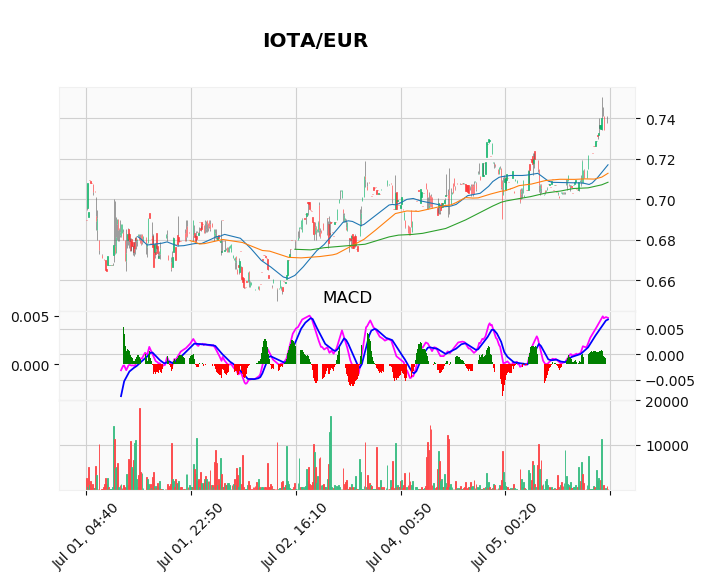

In [5]:
# macd
data["macd"], data["macd_signal"], data["macd_hist"] = ta.MACD(data['Close'])

# macd panel
colors = ['g' if v >= 0 else 'r' for v in data["macd_hist"]]
macd_plot = mpf.make_addplot(data["macd"], panel=1, color='fuchsia', title="MACD")
macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors) # color='dimgray'
macd_signal_plot = mpf.make_addplot(data["macd_signal"], panel=1, color='b')

# plot
plots = [macd_plot, macd_signal_plot, macd_hist_plot]
# mpf.plot(data[-180:], type='candle', style='yahoo', mav=(50,100,200), addplot=plots, title=f"\n{ticker_name}", volume=True, volume_panel=2, ylabel='', ylabel_lower='')
mpf.plot(data, type='candle', style='yahoo', mav=(50,100,200), addplot=plots, title=f"\n{ticker_name}", volume=True, volume_panel=2, ylabel='', ylabel_lower='')


In [ ]:
pp.pprint(bitpanda.fetch_open_orders())

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2)
last_trade = bitpanda.fetch_trades('IOTA/EUR')
# print(last_trade)
# pp.pprint(last_trade)

data = pd.DataFrame(last_trade,index=None)

# The scope of these changes made to
# pandas settings are local to with statement.
# with pd.option_context('display.max_rows', None,
#                          'display.max_columns', None,
#                          'display.precision', 3,
#                          ):
print(data)
# print(data.info())


In [ ]:
Order_book = (bitpanda.fetchOrderBook ('IOTA/EUR',10))
# print (Order_book)
print('Bieden', Order_book['bids'][0],Order_book['bids'][1],Order_book['bids'][2])
print('Laten', Order_book['asks'][0],Order_book['asks'][1],Order_book['asks'][2],Order_book['asks'][3],Order_book['asks'][4])

In [ ]:
ticker_name = 'IOTA/EUR'
# order = bitpanda.createLimitBuyOrder(ticker_name, 350, 1.82272)
print(order)

In [ ]:
ticker_name = 'IOTA/EUR'
# order = bitpanda.create_market_buy_order(ticker_name, 10)
print(order)

In [ ]:
trades = bitpanda.fetch_my_trades()
data = pd.DataFrame(trades,index=None)

print(data)

https://plotly.com/python/financial-charts/

In [ ]:
from datetime import datetime
import plotly.graph_objects as go

dates = []
open_data = []
high_data = []
low_data = []
close_data = []
volume_data = []

# candles = bitpanda.fetch_ohlcv ('IOTA/EUR', '1m')
candles = bitpanda.fetch_ohlcv ('IOTA/EUR', '1h')
# candles = bitpanda.fetch_ohlcv ('BTC/EUR', '1h')

for candle in candles:
    dates.append(datetime.fromtimestamp(candle[0] / 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f'))
    open_data.append(candle[1])
    high_data.append(candle[2])
    low_data.append(candle[3])
    close_data.append(candle[4])
    volume_data.append(candle[5])
    
fig = go.Figure(data=[go.Candlestick(x=dates,
                      open=open_data, high=high_data,
                      low=low_data, close=close_data)])
fig.show()

In [ ]:
bitpanda.close()

In [ ]:
import asyncio
import os
import sys

root = 'c:/users/cor/Documents'
sys.path.append(root + '/python')

import ccxt.async_support as ccxt  # noqa: E402


async def main(symbol):
    # you can set enableRateLimit = True to enable the built-in rate limiter
    # this way you request rate will never hit the limit of an exchange
    # the library will throttle your requests to avoid that

    exchange = ccxt.bitpanda({
        'enableRateLimit': True,  # this option enables the built-in rate limiter
    })
    while True:
        print('--------------------------------------------------------------')
        print(exchange.iso8601(exchange.milliseconds()), 'fetching', symbol, 'ticker from', exchange.name)
        # this can be any call instead of fetch_ticker, really
        try:
            ticker = await exchange.fetch_ticker(symbol)
            print(exchange.iso8601(exchange.milliseconds()), 'fetched', symbol, 'ticker from', exchange.name)
            print(ticker)
        except ccxt.RequestTimeout as e:
            print('[' + type(e).__name__ + ']')
            print(str(e)[0:200])
            # will retry
        except ccxt.DDoSProtection as e:
            print('[' + type(e).__name__ + ']')
            print(str(e.args)[0:200])
            # will retry
        except ccxt.ExchangeNotAvailable as e:
            print('[' + type(e).__name__ + ']')
            print(str(e.args)[0:200])
            # will retry
        except ccxt.ExchangeError as e:
            print('[' + type(e).__name__ + ']')
            print(str(e)[0:200])
            break  # won't retry


asyncio.get_event_loop().run_until_complete(main('IOTA/EUR'))
